Risky Febriawan -
Matematika

Image Recognition adalah proses identifikasi dan pendeteksian sebuah objek atau fitur di dalam sebuah gambar digital atau video. Pada kesempatan kali ini saya ingin mencoba melakukan image recognition agar dapat membedakan muka antara gambar seorang pria dengan seorang wanita. Saya memilih topik ini karena banyak hal yang dapat digunakan apabila robot/AI dapat membedakan antara pria dan wanita yang nantinya akan memudahkan pekerjaan sehari-hari kita. Kali ini saya mengambil dataset berupa gambar wajah pria dan wanita indonesia karena sudah banyak penelitian dengan dataset menggunakan wajah pria dan wanita yang berasal dari luar negeri. Setelah saya mencoba program dengan dataset wajah dari orang luar negeri, hasilnya kurang cocok digunakan untuk wajah orang Indonesia karena ada beberapa perbedaan struktur pada bagian kepala khususnya di bagian wajah. Maka dari itu saya mencoba melalukan percobaan dengan menggunakan dataset yang berisikan wajah pria dan wanita dari Indonesia. Dataset ini sendiri saya dapatkan dari mesin pencarian google.

In [69]:
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import numpy as np
import pickle

Data Preparation. Menyiapkan data sample yang akan kita proses untuk melakukan training dan validasi. Pada kesempatan kali ini saya menggunakan masing-masing sebanyak 1330 untuk wajah pria dan wanita Indonesia

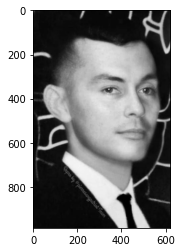

In [70]:
DATADIR = "C:/Users/User/Skrip"

CATEGORIES = ["Priaa", "Wanitaa"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show() 
        break
    break

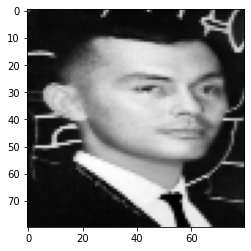

In [71]:
IMG_SIZE = 80

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Mengubah sample data dari RGB(3 dimensi) menjadi grayscale(1 dimensi). Pada pengubahan sebuah gambar menjadi grayscale dapat  dilakukan dengan cara mengambil semua pixel pada gambar kemudian warna tiap  pixel akan diambil informasi mengenai 3  warna dasar yaitu  merah, biru  dan hijau(RGB), ketiga warna dasar ini akan dijumlahkan kemudian dibagi tiga sehingga didapat nilai rata-rata. Nilai rata-rata inilah yang  akan dipakai  untuk memberikan warna pada pixel gambar sehingga warna menjadi grayscale. Proses mengubah RGB menjadi grayscale perlu dilakukan agar dapat mengurangi informasi dari setiap pixel nya dan meringankan mesin untuk melakukan proses training karena hanya menggunakan 1 dimensi.

Lalu melakukan resize untuk semua sample karena pada awalnya semua sample memiliki dimensi(width dan height) yang berbeda-beda. Setelah itu semua sample digabung menjadi 1 list 

In [72]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: 
                pass

create_training_data()

print(len(training_data))

100%|██████████| 1330/1330 [00:24<00:00, 53.78it/s]

2658


In [73]:
import random

random.shuffle(training_data)

In [74]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
1
0
1
1


In [75]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 39]
   [ 69]
   [ 87]
   ...
   [ 70]
   [ 72]
   [ 39]]

  [[ 39]
   [ 75]
   [ 82]
   ...
   [ 70]
   [ 77]
   [ 39]]

  [[ 39]
   [ 81]
   [ 91]
   ...
   [ 72]
   [ 83]
   [ 39]]

  ...

  [[ 39]
   [ 17]
   [ 19]
   ...
   [239]
   [245]
   [ 39]]

  [[ 39]
   [ 15]
   [ 14]
   ...
   [239]
   [242]
   [ 39]]

  [[ 39]
   [ 16]
   [ 15]
   ...
   [238]
   [241]
   [ 39]]]]


In [76]:
X.shape

(2658, 80, 80, 1)

In [77]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## STEP 2

In [78]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle

In [79]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

Melalukan pemodelan terhadap data training. pada kesempatan kali ini saya menggunakan beberapa hidden layer dengan compile optimizer menggunakan adam dan loss menggunakan binary_crossentropy

In [80]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 78, 78, 256)       2560      
_________________________________________________________________
activation_3 (Activation)    (None, 78, 78, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       590080    
_________________________________________________________________
activation_4 (Activation)    (None, 37, 37, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)            

In [81]:
IMG_SIZE = 80

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

In [82]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 2392 samples, validate on 266 samples
Epoch 1/10
2392/2392 [==============================] - 211s 88ms/sample - loss: 0.8484 - accuracy: 0.5807 - val_loss: 0.6767 - val_accuracy: 0.6391
Epoch 2/10
2392/2392 [==============================] - 208s 87ms/sample - loss: 0.6306 - accuracy: 0.6626 - val_loss: 0.6505 - val_accuracy: 0.6429
Epoch 3/10
2392/2392 [==============================] - 199s 83ms/sample - loss: 0.5914 - accuracy: 0.7036 - val_loss: 0.6453 - val_accuracy: 0.6579
Epoch 4/10
2392/2392 [==============================] - 190s 79ms/sample - loss: 0.5492 - accuracy: 0.7304 - val_loss: 0.6532 - val_accuracy: 0.6617
Epoch 5/10
2392/2392 [==============================] - 194s 81ms/sample - loss: 0.5090 - accuracy: 0.7600 - val_loss: 0.7642 - val_accuracy: 0.6353
Epoch 6/10
2392/2392 [==============================] - 199s 83ms/sample - loss: 0.4862 - accuracy: 0.7738 - val_loss: 0.6894 - val_accuracy: 0.6729
Epoch 7/10
2392/2392 [==============================] - 206

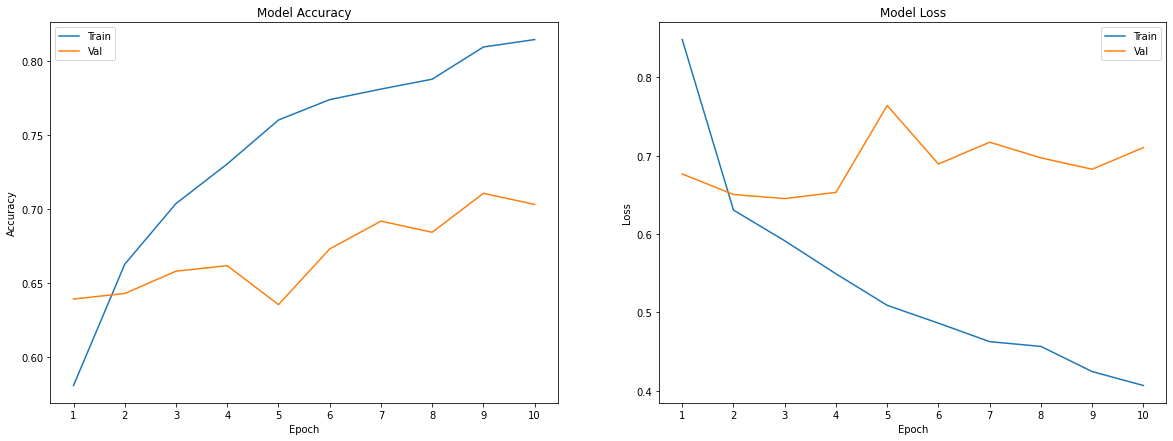

In [83]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
#plt.xticks(np.arange(0, len(model.history.history["binary_accuracy"]), 1))

plt.xticks(np.arange(len(model.history.history["accuracy"])), np.arange(1, len(model.history.history["accuracy"])+1, 1))

plt.subplot(1, 2, 2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(len(model.history.history["loss"])), np.arange(1, len(model.history.history["loss"])+1, 1))
plt.show()

In [108]:
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Train on 2392 samples, validate on 266 samples
Epoch 1/5
2392/2392 [==============================] - 196s 82ms/sample - loss: 0.3930 - accuracy: 0.8223 - val_loss: 0.7368 - val_accuracy: 0.7105
Epoch 2/5
2392/2392 [==============================] - 189s 79ms/sample - loss: 0.3747 - accuracy: 0.8382 - val_loss: 0.6981 - val_accuracy: 0.7368
Epoch 3/5
2392/2392 [==============================] - 184s 77ms/sample - loss: 0.3548 - accuracy: 0.8457 - val_loss: 0.7441 - val_accuracy: 0.6917
Epoch 4/5
2392/2392 [==============================] - 189s 79ms/sample - loss: 0.3420 - accuracy: 0.8436 - val_loss: 0.7430 - val_accuracy: 0.7218
Epoch 5/5
2392/2392 [==============================] - 185s 77ms/sample - loss: 0.3274 - accuracy: 0.8604 - val_loss: 0.7548 - val_accuracy: 0.6992


In [109]:
model.save("modeldsu.h5")

In [110]:
new_model = tf.keras.models.load_model('modeldsu.h5')

In [122]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 2392 samples, validate on 266 samples
Epoch 1/10
2392/2392 [==============================] - 205s 86ms/sample - loss: 0.3125 - accuracy: 0.8704 - val_loss: 0.8845 - val_accuracy: 0.7030
Epoch 2/10
2392/2392 [==============================] - 188s 79ms/sample - loss: 0.2964 - accuracy: 0.8796 - val_loss: 0.8664 - val_accuracy: 0.7105
Epoch 3/10
2392/2392 [==============================] - 186s 78ms/sample - loss: 0.2892 - accuracy: 0.8771 - val_loss: 0.8407 - val_accuracy: 0.6992
Epoch 4/10
2392/2392 [==============================] - 187s 78ms/sample - loss: 0.2788 - accuracy: 0.8809 - val_loss: 0.8647 - val_accuracy: 0.7143
Epoch 5/10
2392/2392 [==============================] - 185s 77ms/sample - loss: 0.2582 - accuracy: 0.8955 - val_loss: 0.9829 - val_accuracy: 0.7143
Epoch 6/10
2392/2392 [==============================] - 184s 77ms/sample - loss: 0.2404 - accuracy: 0.9055 - val_loss: 0.9763 - val_accuracy: 0.6917
Epoch 7/10
2392/2392 [==============================] - 183

## TEST

In [123]:
import pandas as pd
import glob

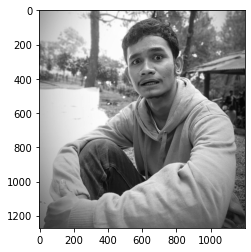

In [124]:
DATADIR_2 = "C:/Users/User/Skrip"

CATEGORIES_2 = ["Test"]

for category_2 in CATEGORIES_2:
    path = os.path.join(DATADIR_2,category_2)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break 
    break 

In [125]:
testing_data = []

def create_testing_data():
    for category_2 in CATEGORIES_2:

        path = os.path.join(DATADIR_2,category_2)  
        class_num = CATEGORIES_2.index(category_2)  

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (80, 80)) 
                testing_data.append([new_array]) 
            except Exception as e: 
                pass
            

create_testing_data()

print(len(testing_data))

100%|██████████| 22/22 [00:00<00:00, 106.27it/s]

22


In [126]:
testing_data = np.array(testing_data).reshape(-1, 80, 80, 1)
testing_data.shape
test_list=glob.glob("test/*")

In [127]:
result = model.predict(testing_data)

idx = []
for i in test_list:
    idx.append(i[5:-4])
idx

['apis.',
 'apis2.',
 'farina.',
 'gani.',
 'hazmi.',
 'kosrun.',
 'lambang.',
 'ning.',
 'panji.',
 'pigia.',
 'pria',
 'rul1.',
 'rul2.',
 'rul3.',
 'rul4.',
 'rul5.',
 'samplefemale',
 'samplemale',
 'sky (2).',
 'sky (3).',
 'sky.',
 'wanita']

In [128]:
for i in range (18):
    print (result[i])

[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[3.8417898e-25]
[0.91504985]
[0.91504985]
[1.1306296e-05]
[3.1565058e-26]
[0.]


In [129]:
model.predict_classes(testing_data)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [130]:
result = result.reshape(result.shape[0])
result[result>0.5] = 1 
result[result<0.5] = 0 

gender= ["Laki-Laki","Perempuan"]
gender[int(result[0])]

'Perempuan'

In [131]:
result_str=[]
for i in range(len(result)):
    result_str.append(gender[int(result[i])])

In [132]:
submission = {"id": idx, "label": result_str}

pd.DataFrame(submission).to_csv("hasildsu.csv", index=False)

In [133]:
pd.DataFrame(submission)

,id,label
0,apis.,Perempuan
1,apis2.,Perempuan
2,farina.,Perempuan
3,gani.,Perempuan
4,hazmi.,Laki-Laki
5,kosrun.,Laki-Laki
6,lambang.,Perempuan
7,ning.,Perempuan
8,panji.,Laki-Laki
9,pigia.,Perempuan


Dari hasil dapat dilihat masih terdapat beberapa prediksi yang kurang tepat. Hal tersebut mungkin terjadi karena kurang sesuainya dataset(tidak pas crop di muka) dan masih ada beberapa background yang terdapat di dataset sehingga sistem menjadi kesulitan untuk melakukan training. Begitu pula dengan jumlah sample yang masih terbilang sedikit, metode dan layer pun masiih kurang tepat dalam melakukan percobaan ini yang mungkin saja dengan mengurangi beberapa hidden layer dan mengubah optimizernya mungkin akan meningkatkan akurasi hasil dari percobaan ini. Model juga mungkin overfitting karena di epoch terakhir akurasi menurun sedangkan loss nya menambah.